In [1]:
import sys
sys.path.insert(0, '/home/aymane/School/pothole-localization/src/data')
sys.path.insert(1, '/home/aymane/School/pothole-localization/src/helper')


In [2]:
#TODO add all modules to path using a function
import torch
import torch.utils.data 
import numpy as np
# import pytorch_lightning as pl
from torch.utils.data import DataLoader
from dataset import SegDataset

dataset = SegDataset(raw_path='/home/aymane/School/pothole-localization/data/segmentation/raw')

split = [int(len(dataset) * i) for i in [0.8, 0.1, 0.1]]

train, test, valid = torch.utils.data.random_split(dataset, split)

train_data  = DataLoader(dataset=train, batch_size=1, shuffle=True, num_workers=8)
# test_data   = DataLoader(dataset=test, batch_size=1, shuffle=False, num_workers=8)
# valid_data  = DataLoader(dataset=valid, batch_size=1, shuffle=False, num_workers=8)

# del train, test, valid

/home/aymane/School/pothole-localization/src/data/dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_tensor      = torch.tensor(transform(img)).detach().clone().squeeze_()
/home/aymane/School/pothole-localization/src/data/dataset.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor    = torch.tensor(transform(label)).detach().clone().squeeze_()


In [3]:
len(train_data)

3360

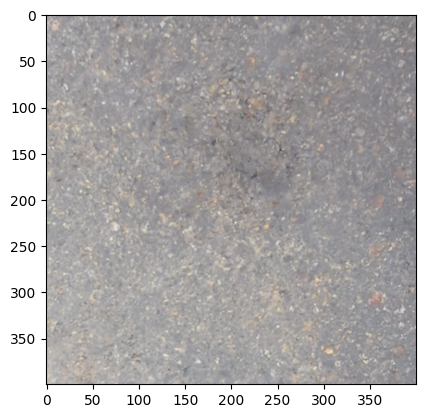

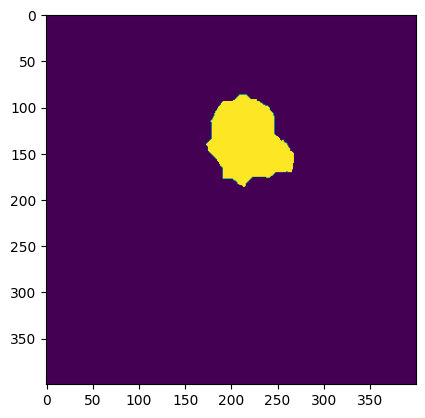

In [4]:
# import required libraries
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from display_image import display_image as di


# define a torch tensor
i = 1245


tensor1 = train[i][0]
tensor2 = train[i][1]

di(tensor1)
di(tensor2)

In [ ]:
from segtune import SegformerFinetuner 

segformer_finetuner = SegformerFinetuner(
    train_dataloader=train_data, 
    val_dataloader=valid_data, 
    test_dataloader=test_data, 
    metrics_interval=10,
)

In [ ]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint

early_stop_callback = EarlyStopping(
    monitor="val_loss", 
    min_delta=0.00, 
    patience=3, 
    verbose=False, 
    mode="min",
)

checkpoint_callback = ModelCheckpoint(save_top_k=1, monitor="val_loss")

trainer = pl.Trainer(
    precision=16,
    gpus=0, 
    callbacks=[early_stop_callback, checkpoint_callback],
    max_epochs=500,
    val_check_interval=len(train),
)

trainer.fit(segformer_finetuner)

In [ ]:
a = torch.zeros((3, 2, 2))
b = torch.tensor([[1, 2], [3, 4]])

a[0] = b

In [ ]:
print(a)